In [11]:
from torch.utils.data import Dataset

In [12]:
class NumbersDataset(Dataset):
    def __init__(self, low, high):
        self.samples = list(range(low, high))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

In [13]:
dataset = NumbersDataset(100, 400)
print('Length: ', len(dataset))
print('Sample: ', dataset[10:16])

Length:  300
Sample:  [110, 111, 112, 113, 114, 115]


In [14]:
from torch.utils.data import DataLoader

#### Loader

In [18]:
dataloader = DataLoader(dataset, batch_size=40, shuffle=True)

for i, batch in enumerate(dataloader):
    print(i, batch)

0 tensor([315, 205, 164, 374, 304, 244, 267, 335, 351, 173, 349, 371, 384, 114,
        365, 116, 291, 230, 283, 127, 211, 329, 185, 112, 181, 186, 287, 101,
        206, 175, 383, 195, 300, 361, 105, 261, 290, 308, 232, 155])
1 tensor([382, 381, 251, 219, 243, 338, 103, 373, 118, 246, 305, 161, 218, 168,
        157, 272, 136, 121, 227, 133, 337, 284, 399, 236, 152, 169, 375, 119,
        395, 324, 242, 389, 192, 225, 196, 378, 247, 189, 143, 126])
2 tensor([292, 346, 331, 321, 191, 156, 298, 216, 237, 193, 344, 172, 293, 295,
        160, 125, 179, 264, 130, 394, 271, 282, 336, 276, 100, 102, 333, 286,
        262, 274, 397, 221, 390, 190, 137, 367, 289, 220, 235, 342])
3 tensor([214, 341, 166, 174, 318, 253, 323, 176, 104, 302, 115, 145, 265, 167,
        270, 147, 120, 362, 142, 393, 140, 171, 128, 213, 109, 248, 376, 210,
        339, 241, 250, 359, 138, 162, 266, 258, 353, 306, 363, 144])
4 tensor([255, 279, 110, 113, 146, 107, 240, 131, 183, 277, 197, 387, 234, 194,
        150,

In [27]:
import matplotlib.pyplot as plt
import cv2

plt.style.use('dark_background')

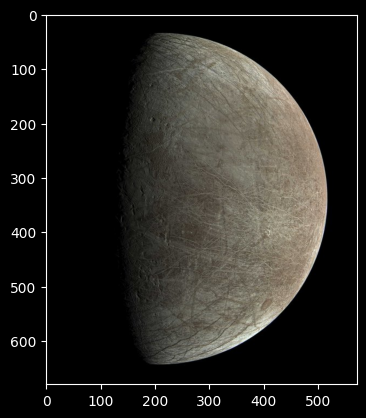

In [28]:
dt = cv2.imread('data/moon.jpg')
dt = cv2.cvtColor(dt, cv2.COLOR_RGB2BGR)
#plt.axis('off')
plt.imshow(dt)

In [29]:
from torch.utils.data import Dataset
import os

In [30]:
class ImgDataset(Dataset):
    def __init__(self, path='data', transform=None):
        self.path = path
        self.samples = [el for el in os.listdir(self.path) if el.endswith('.jpg')]
        print(self.samples)
        if transform is None:
            self.should_transform = False
        else:
            self.transform = transform
            self.should_transform = True

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path = os.path.join(self.path, self.samples[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        if self.should_transform:
            img_transformed = self.transform(img)
        else:
            img_transformed = img

        return {'image': img_transformed, 'type': 'satellites'}

['moon.jpg']


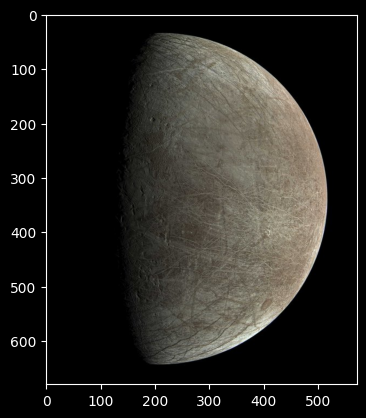

In [31]:
dataset = ImgDataset()
plt.imshow(dataset[0]['image'])
plt.show()

#### Transformation

In [35]:
from torchvision import transforms, utils

In [46]:
img = dataset[0]['image']
scale_factor = 0.5
img_size = dataset[0]['image'].shape[:2]

scaled_size = (int(img_size[0]*scale_factor), int(img_size[1]*scale_factor))
crop_size = (10, 10)

In [47]:
data_transform_list = [
    transforms.ToPILImage(),
    transforms.Resize(scaled_size),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]

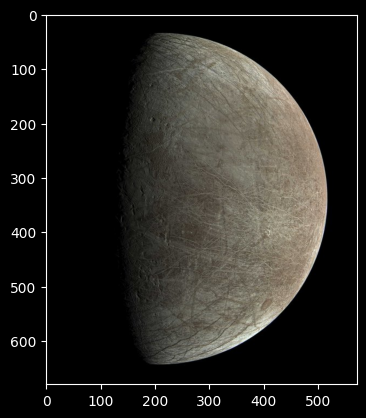

In [48]:
pil_img = data_transform_list[0](img)
plt.imshow(pil_img)
plt.show()

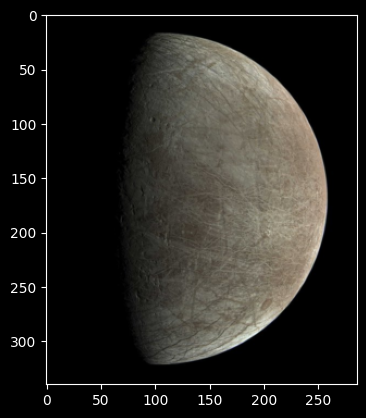

In [49]:
plt.imshow(data_transform_list[1](pil_img))
plt.show()